In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re



#**Part 1: Data Loading and Basic Exploration**

In [10]:
# Loading dataset (metadata.csv)


df = pd.read_csv(
    "metadata.csv",
    engine="python",
    on_bad_lines="skip"  # skips bad/truncated rows
)


In [11]:
# Inspecting the first few rows
df.head(10)



,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
5,zjufx4fo,b2897e1277f56641193a6db73825f707eed3e4c9,PMC,Sequence requirements for RNA strand transfer ...,10.1093/emboj/20.24.7220,PMC125340,11742998,green-oa,Nidovirus subgenomic mRNAs contain a leader se...,2001-12-17,"Pasternak, Alexander O.; van den Born, Erwin; ...",The EMBO Journal,NaN,NaN,NaN,document_parses/pdf_json/b2897e1277f56641193a6...,document_parses/pmc_json/PMC125340.xml.json,http://europepmc.org/articles/pmc125340?pdf=re...,NaN
6,5yhe786e,3bb07ea10432f7738413dff9816809cc90f03f99,PMC,Debate: Transfusing to normal haemoglobin leve...,10.1186/cc987,PMC137267,11299062,no-cc,Recent evidence suggests that critically ill p...,2001-03-08,"Alvarez, Gonzalo; Hébert, Paul C; Szick, Sharyn",Crit Care,NaN,NaN,NaN,document_parses/pdf_json/3bb07ea10432f7738413d...,document_parses/pmc_json/PMC137267.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
7,8zchiykl,5806726a24dc91de3954001effbdffd7a82d54e2,PMC,The 21st International Symposium on Intensive ...,10.1186/cc1013,PMC137274,11353930,no-cc,The 21st International Symposium on Intensive ...,2001-05-02,"Ball, Jonathan; Venn, Richard",Crit Care,NaN,NaN,NaN,document_parses/pdf_json/5806726a24dc91de39540...,document_parses/pmc_json/PMC137274.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
8,8qnrcgnk,faaf1022ccfe93b032c5608097a53543ba24aedb,PMC,Heme oxygenase-1 and carbon monoxide in pulmon...,10.1186/1465-9921-4-7,PMC193681,12964953,no-cc,"Heme oxygenase-1 (HO-1), an inducible stress p...",2003-08-07,"Slebos, Dirk-Jan; Ryter, Stefan W; Choi, Augus...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/faaf1022ccfe93b032c56...,document_parses/pmc_json/PMC193681.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
9,jg13scgo,5b44feca5d6ffaaeb6

In [12]:
# Data dimensions
print("Shape:", df.shape)



Shape: (130978, 19)


In [13]:
# Data types and info
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130978 entries, 0 to 130977
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          130978 non-null  object 
 1   sha               58333 non-null   object 
 2   source_x          130978 non-null  object 
 3   title             130781 non-null  object 
 4   doi               130978 non-null  object 
 5   pmcid             79535 non-null   object 
 6   pubmed_id         84567 non-null   object 
 7   license           130978 non-null  object 
 8   abstract          94515 non-null   object 
 9   publish_time      130978 non-null  object 
 10  authors           120448 non-null  object 
 11  journal           126764 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  0 non-null       float64
 14  arxiv_id          0 non-null       float64
 15  pdf_json_files    58333 non-null   object 
 16  pmc_json_files    55

In [17]:
#Finding Missing values
df.isnull().sum().sort_values(ascending=False)



,0
mag_id,130978
pmc_json_files,75557
sha,72645
pdf_json_files,72645
pmcid,51443
pubmed_id,46411
abstract,36463
authors,10530
journal,4214
title,197


In [19]:
# Basic statistics
df.describe()

,mag_id
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


#**Part 2: Data Cleaning and Preparation**

In [20]:
# Handle missing values - drop rows with missing titles or abstracts
df = df.dropna(subset=["title", "abstract"])



In [21]:
# Missing values in abstract and Title
df.isnull().sum().sort_values(ascending=False)



,0
mag_id,94476
pmc_json_files,48709
sha,44907
pdf_json_files,44907
pmcid,39032
pubmed_id,28511
journal,2564
authors,731
license,0
doi,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94476 entries, 0 to 130977
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cord_uid        94476 non-null  object 
 1   sha             49569 non-null  object 
 2   source_x        94476 non-null  object 
 3   title           94476 non-null  object 
 4   doi             94476 non-null  object 
 5   pmcid           55444 non-null  object 
 6   pubmed_id       65965 non-null  object 
 7   license         94476 non-null  object 
 8   abstract        94476 non-null  object 
 9   publish_time    94476 non-null  object 
 10  authors         93745 non-null  object 
 11  journal         91912 non-null  object 
 12  mag_id          0 non-null      float64
 13  pdf_json_files  49569 non-null  object 
 14  pmc_json_files  45767 non-null  object 
 15  url             94476 non-null  object 
dtypes: float64(1), object(15)
memory usage: 12.3+ MB


In [23]:
# Converting publish_time to datetime
df["publish_time"] = pd.to_datetime(df["publish_time"], errors="coerce")


/tmp/ipython-input-317400740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["publish_time"] = pd.to_datetime(df["publish_time"], errors="coerce")


In [24]:
# Extracting year
df["year"] = df["publish_time"].dt.year



/tmp/ipython-input-3321400225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df["publish_time"].dt.year


In [25]:
# Abstract word count
df["abstract_word_count"] = df["abstract"].apply(lambda x: len(str(x).split()))


/tmp/ipython-input-2960909430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["abstract_word_count"] = df["abstract"].apply(lambda x: len(str(x).split()))


#**Part 3: Data Analysis and Visualization**

####**1. Papers by year**

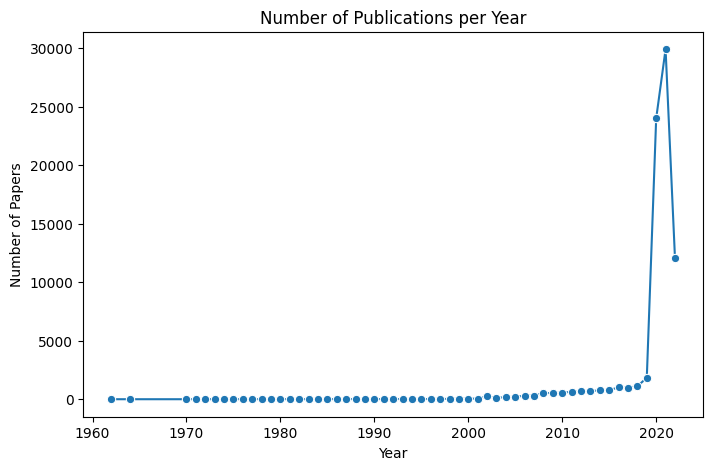

In [26]:
papers_per_year = df["year"].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.lineplot(x=papers_per_year.index, y=papers_per_year.values, marker="o")
plt.title("Number of Publications per Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.show()


####**2. Top journals**

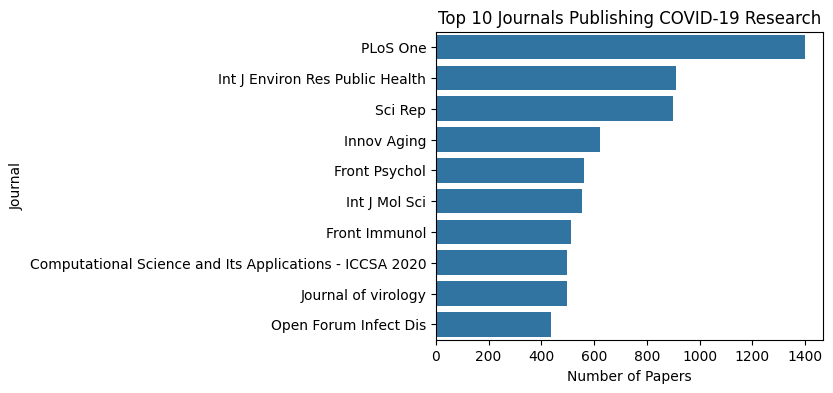

In [27]:
top_journals = df["journal"].value_counts().head(10)

plt.figure(figsize=(5,4))
sns.barplot(x=top_journals.values, y=top_journals.index)
plt.title("Top 10 Journals Publishing COVID-19 Research")
plt.xlabel("Number of Papers")
plt.ylabel("Journal")
plt.show()


####**3. Word frequency in titles**

In [28]:
# Tokenize titles
all_words = " ".join(df["title"].dropna()).lower()
words = re.findall(r"\b[a-z]{4,}\b", all_words)  # words with >=4 letters
word_freq = Counter(words).most_common(20)

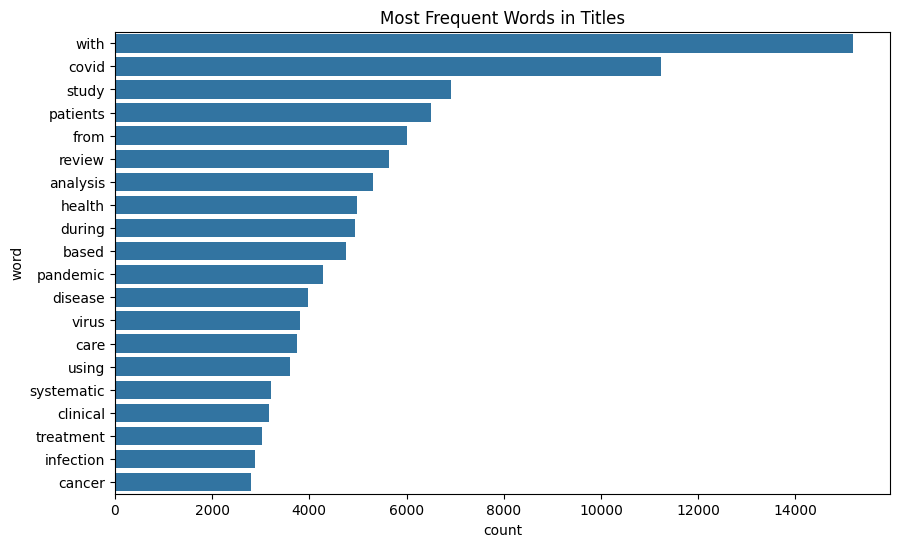

In [29]:
# Convert to DataFrame
word_df = pd.DataFrame(word_freq, columns=["word", "count"])

plt.figure(figsize=(10,6))
sns.barplot(x="count", y="word", data=word_df)
plt.title("Most Frequent Words in Titles")
plt.show()